<a href="https://colab.research.google.com/github/ncat-morrow/isen-project-1-visionary-s/blob/main/ISEN_370_Module_2_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ISEN 370 Project 2 Assignment
In this assignment, you will use data science tools to exlore two datasets, calculate confidence intervals and conduct a hypothesis testing on the given datasets.
You can use ISEN 370 Project 2 Demo file as a reference when completing this assignment.


First, you will need to import required libraries to the project.

In [4]:

import numpy as np

In [5]:
import pandas as pd

In [6]:
import matplotlib.pyplot as plt

In [7]:
import scipy.stats as stats

## Data Import

The Learning Enhanced Watershed Assessment System (LEWAS) is a unique real-time water and weather monitoring system. The LEWAS monitoring site is installed at the outfall of the Webb Branch watershed on Virginia Tech’s campus. Webb Branch is an urban stream with a 2.78 square kilometer (about one square mile) watershed consisting of residential and commercial properties. The stream is routed through man-made channels and culverts until it discharges at the LEWAS monitoring site. We first import the LEWAS datasets and print the first 10 rows of data. The data is stored in CSV files for which the path is given in the cell below. There are two CSV files, the first contains data from 9/01/17-9/30/17 and the second contains data from 10/01/17-10/31/17.
The following codes provide the link to where the data are stored.

In [8]:
data_url3='https://github.com/StevenXJiang/DataScienceModule2/raw/main/LEWAS_Storm_Data_Demo_3.csv'
data_url4='https://github.com/StevenXJiang/DataScienceModule2/raw/main/LEWAS_Storm_Data_Demo_4.csv'


## Exploring Data

* Display the first 10 rows of data ufor each of the two data sets mentioned above.

,Date and Time,Water Temperature (F),Est. Flow Rate[m^3/s]
0,9/1/17 12:01 AM,66.236,0.051211
1,9/1/17 12:04 AM,66.236,0.042161
2,9/1/17 12:07 AM,66.146,0.029130
3,9/1/17 12:10 AM,66.200,0.029003
4,9/1/17 12:13 AM,66.236,0.023817
5,9/1/17 12:16 AM,66.254,0.013823
6,9/1/17 12:19 AM,66.272,0.010061
7,9/1/17 12:22 AM,66.290,0.008013
8,9/1/17 12:25 AM,66.254,0.004908
9,9/1/17 12:28 AM,66.290,0.005631


In [10]:
dft2=pd.read_csv(data_url4)
dft2.head(10)

,Date and Time,Water Temperature (F),Estimated Flow Rate (m3/s)
0,10/1/2017 0:19,62.096,0.029084
1,10/1/2017 0:30,61.916,0.032962
2,10/1/2017 0:36,61.862,0.026500
3,10/1/2017 13:25,60.512,0.018774
4,10/1/2017 13:35,60.494,0.016194
5,10/1/2017 13:48,60.566,0.013135
6,10/1/2017 14:33,60.836,0.014517
7,10/1/2017 16:40,62.114,0.011127
8,10/1/2017 17:32,62.204,0.006843
9,10/1/2017 17:46,62.150,0.004584


## Exploring Data
Generate **two** scatter plots: one for the estimated flow rate data in September 2017 and the other for the estimated flow rate data in October 2017. Make sure to provide the title, x axis label and y axis label for your scatter plots.

## Scatter Plot 1

/tmp/ipython-input-2769664543.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1['Date and Time'] = pd.to_datetime(df1['Date and Time'], errors='coerce')


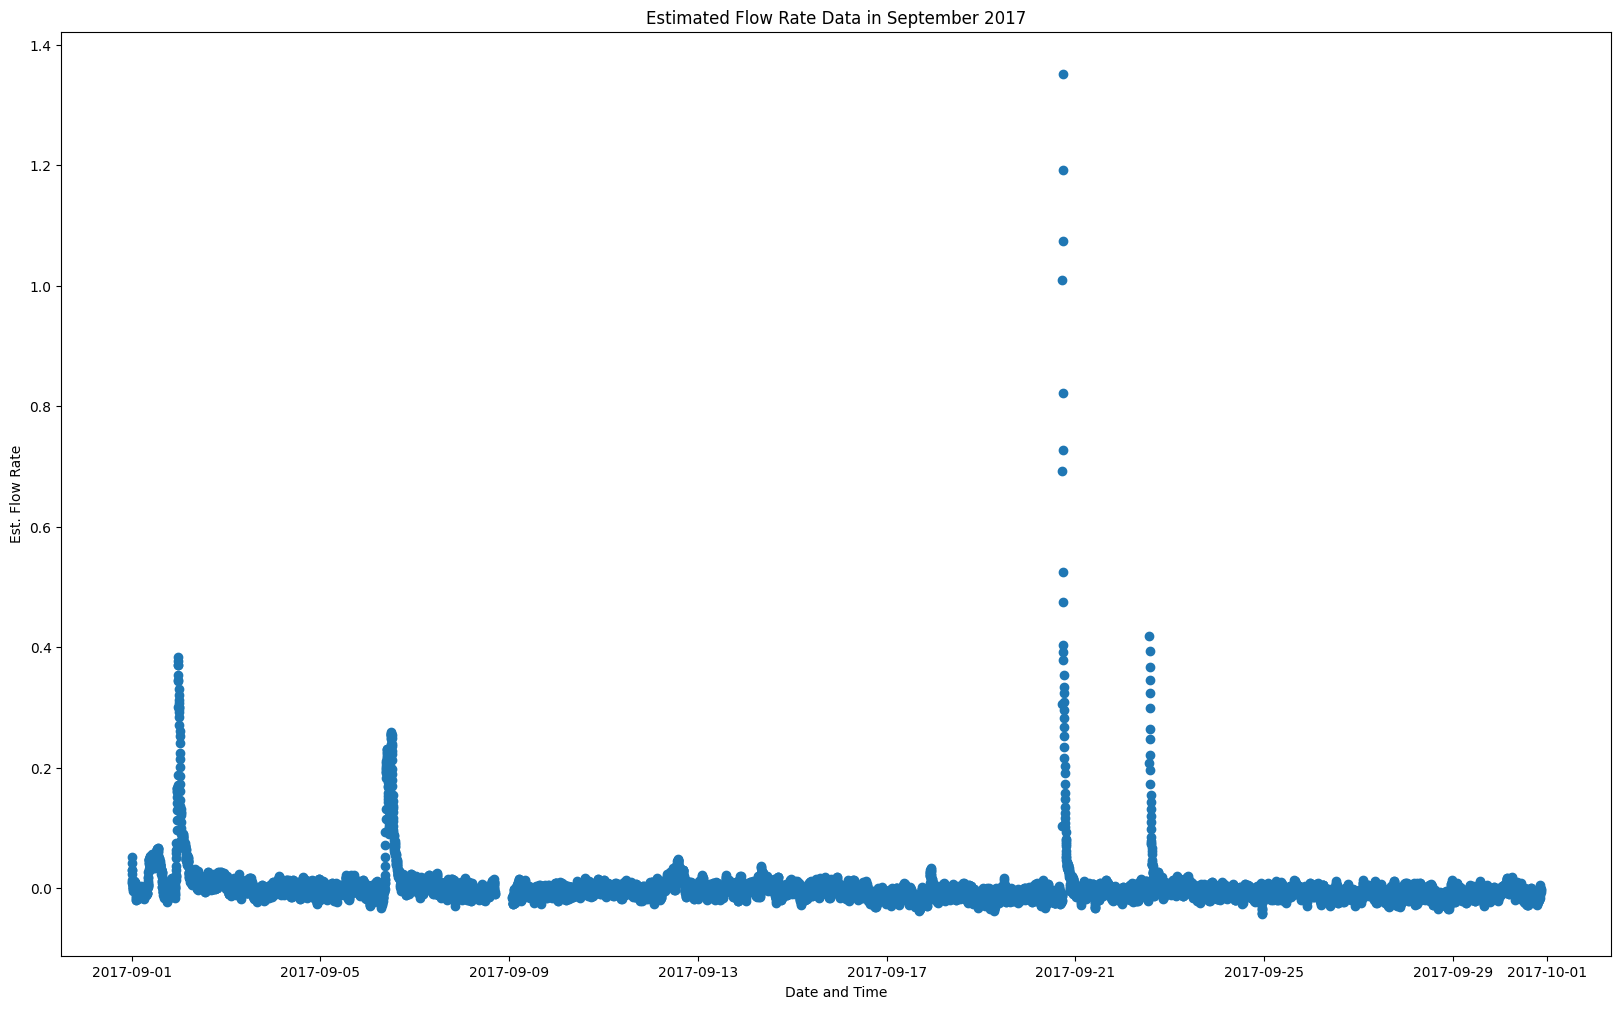

In [42]:
import pandas as pd
data_url3='https://github.com/StevenXJiang/DataScienceModule2/raw/main/LEWAS_Storm_Data_Demo_3.csv'
df1=pd.read_csv(data_url3)

df1['Date and Time'] = pd.to_datetime(df1['Date and Time'], errors='coerce')

if df1['Date and Time'].isnull().any():
  print("Warning: Some 'Date and Time' values could not be parsed and were replaced with NaT.")

plt.figure(figsize=(20,12))
plt.scatter(df1['Date and Time'],df1['Est. Flow Rate[m^3/s]'])
plt.title('Estimated Flow Rate Data in September 2017')
plt.xlabel('Date and Time')
plt.ylabel('Est. Flow Rate')
plt.show()

Comment on the trend of Est. Flow Rate[m^3/s] for September 2017.
<br>
Answer: After September 5th the the flow rate was constant up until September 21st where it skyrocketed.
<BR>

## Scatter Plot 2

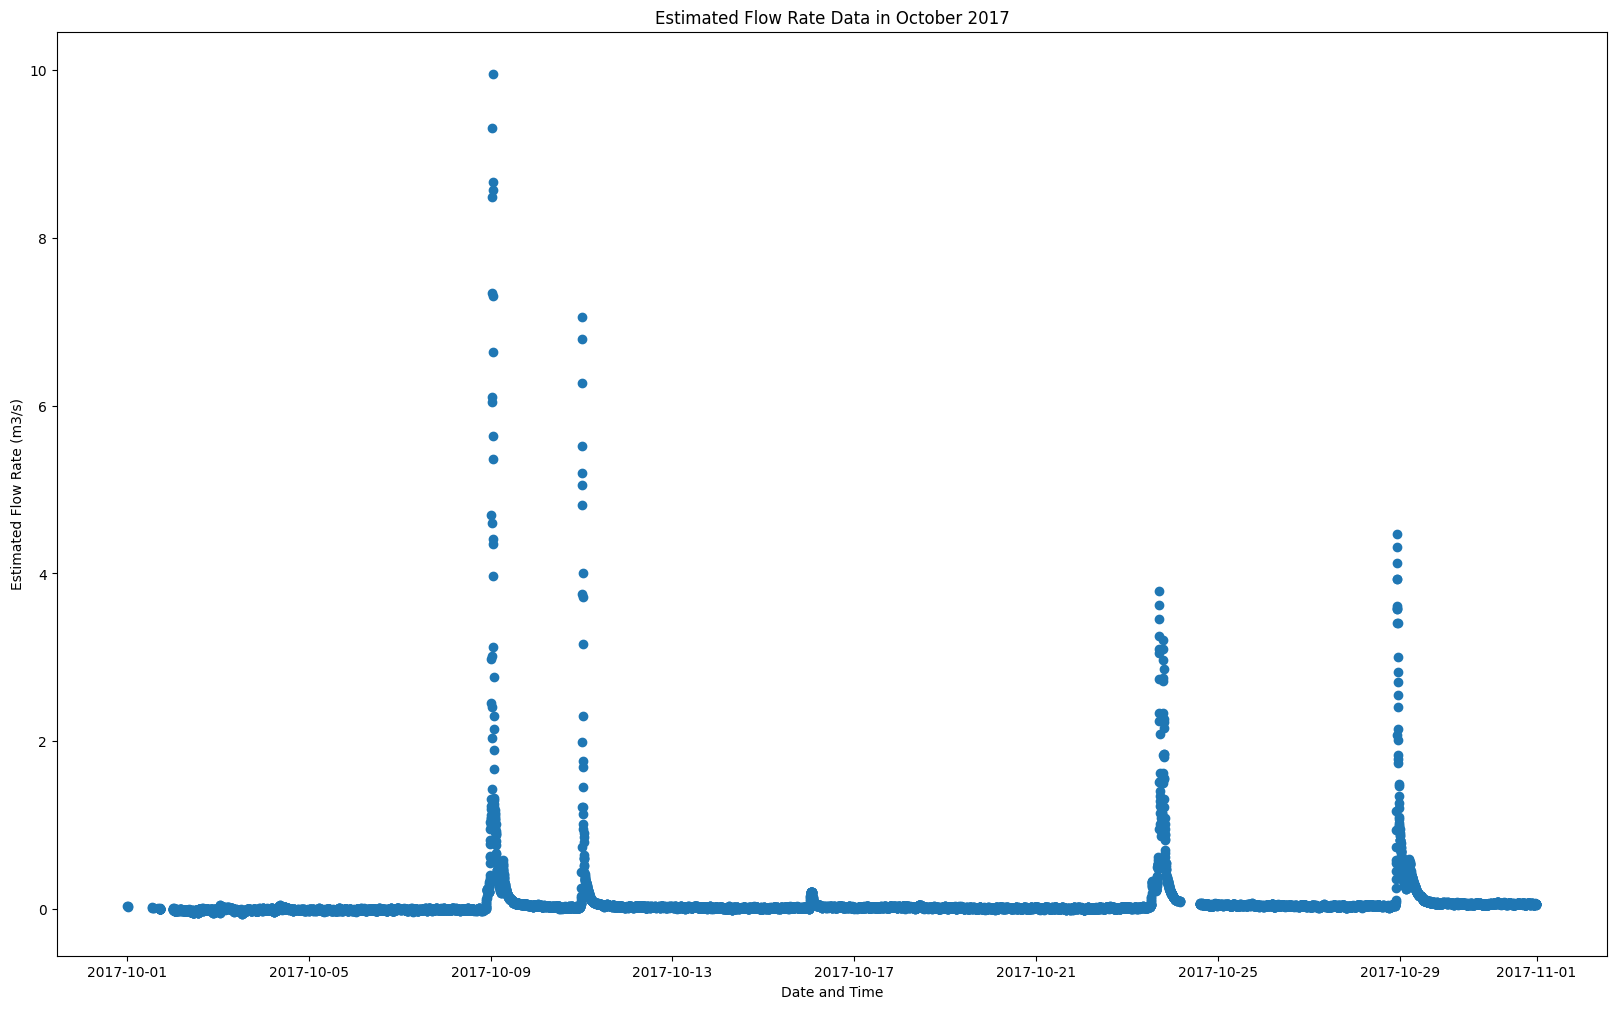

In [24]:
import pandas as pd
data_url4='https://github.com/StevenXJiang/DataScienceModule2/raw/main/LEWAS_Storm_Data_Demo_4.csv'
df2=pd.read_csv(data_url4)

df2['Date and Time'] = pd.to_datetime(df2['Date and Time'], errors='coerce')

if df2['Date and Time'].isnull().any():
  print("Warning: Some 'Date and Time' values in October data could not be parsed and were replaced with NaT.")

plt.figure(figsize=(20,12))
plt.scatter(df2['Date and Time'],df2['Estimated Flow Rate (m3/s)'])
plt.title('Estimated Flow Rate Data in October 2017')
plt.xlabel('Date and Time')
plt.ylabel('Estimated Flow Rate (m3/s)')
plt.show()

Comment on the trend of Est. Flow Rate[m^3/s] for October 2017.
<br>
**Answer:** The trend for October is the flow rate is high from the 9th to the 13th, then lowers back down. The rate increases again from the 25th to the 29th.
<BR>


## Histogram Plotting
Plot a histogram for Est. Flow Rate  data of September 2017. Be sure to include proper titles and axis labels on each of your plots.<br>
Plot a histogram for Est. Flow Rate data of October 2017. Be sure to include proper titles and axis labels on each of your plots.

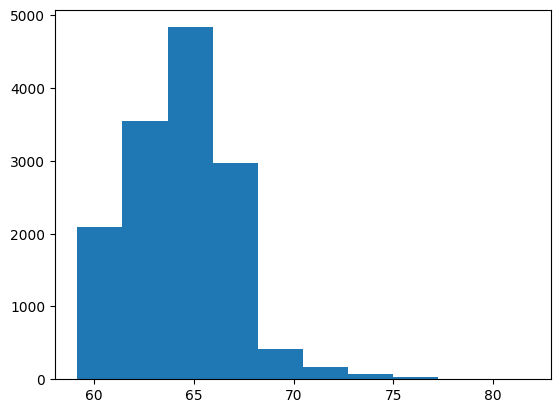

In [26]:
plt.hist(df1["Water Temperature (F)"])
plt.show()

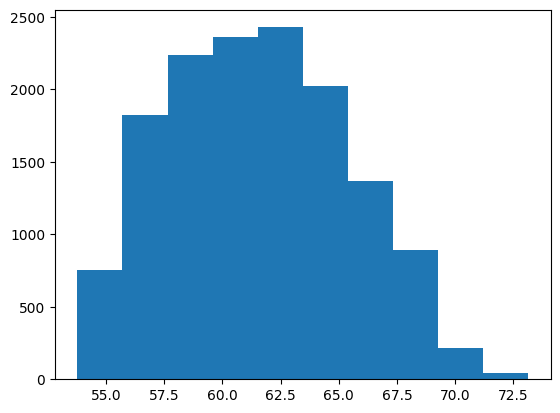

In [33]:
plt.hist(df2["Water Temperature (F)"])
plt.show()

***Comment on the shape of both distributions.***
<br>
***Answer:***
<br> The shape of the water temperature for the second histogram is a lot wider than the first, signifying a larger range of data.
<br>

# Boxplot

Generate a boxplot for Est. Flow Rate data of September 2017.<br>
*Generate* a boxplot for Est. Flow Rate data of October 2017.

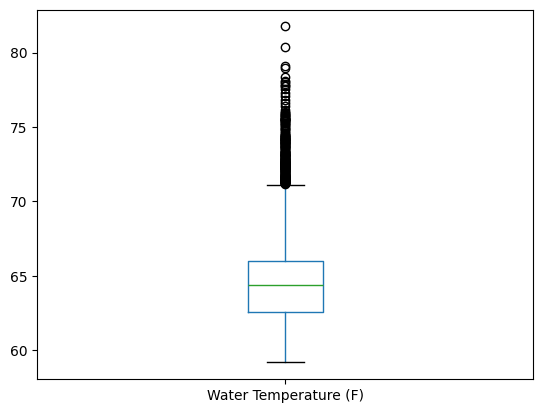

In [34]:
boxplot1=df1.boxplot(column=['Water Temperature (F)'], grid=False)

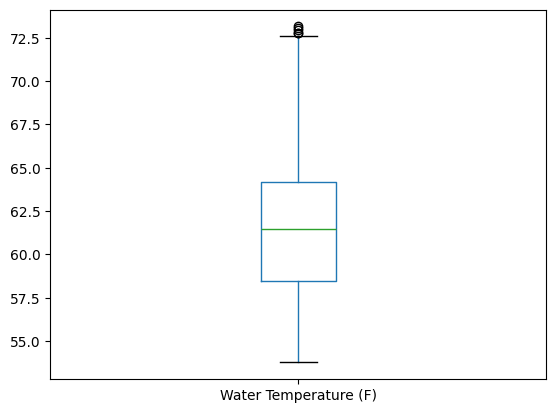

In [35]:
boxplot2=df2.boxplot(column=['Water Temperature (F)'], grid=False)

***Comment on both boxplots***
<br>
***Answer:*** <br>

The first boxplot shows a wider range of values stretching from around the 68 mark to ariund 78, with some outliers above it. The second boxplot shows the values ALL hanging above the 72.5 mark, without many outliers.


#Confidence Interval

Generate the 95% confidence interval for the mean estimated flow rate of September 2017.


In [41]:
stats.norm.interval(confidence=0.95, loc=np.mean(df1["Water Temperature (F)"]), scale=stats.sem(df1["Water Temperature (F)"]))

(np.float64(64.32739524329214), np.float64(64.41327529002233))

Interpret the confidence interval you generated.<br>
***Answer:*** There is 95% chance that the interval (64.327395, 64.41327529) will capture the true mean water temperature for September 2017.

# Hypothesis testing
Suppose we are interested in testing if the mean estimated flow rate from September 2017 is statisticlly different from the mean estimated flow rate from October 2017.

***Question***<br>
How many samples are there in this experiment? What are they?<br>
***Answer***


# Independent Variable and Dependent Variable

***Question***<br>
What is the independent variable and what is the dependent variable of this experiment?

***Answer***

***Question***<br>
What are the assumptions for the two sample t test?

***Answer***



```
# This is formatted as code
```

#Hypothesis testing
Use the appropraite statistical analysis technique.<br>
Conduct model adequacy and comment on the model adequacy.<br>
Conduct hypothesis testing

Based on the tests, what can you conclude about the model assumptions?
<br>
**Answer:**

# 6-Step Hypothesis Testing

1.

2.

3.

4.

5.

6.

In the spalce below, type your experience with your collab project experience. What you like, what you dislike and what you would like to experience in the future collab projects.

